In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib

In [2]:
data = pd.read_csv(r"/content/Training Data.csv")

In [3]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# 1. Data Cleansing

#### A. Heandle Missing Values

In [4]:
data['Id'] = data['Id'].astype(str)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  object
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 25.0+ MB


In [6]:
data.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

#### B. Handle Duplicate Data

In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  object
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 25.0+ MB


#### C. Handle Outliers

In [9]:
# Melalukan subset pada data kategorik
cat_dtypes = ['object']

# Subset dataloan
cat_dataloan = data.select_dtypes(include=cat_dtypes)
cat = [col for col in cat_dataloan.columns if col != 'Id']
print(cat)

['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']


In [10]:
# Melalukan subset pada data numerik
num_dtypes = ['int16','int32','int64','float16','float32','float64']

# Subset dataloan
num_dataloan = data.select_dtypes(include=num_dtypes)
num = [col for col in num_dataloan.columns if col not in ['Risk_Flag']]
print(num)

['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']


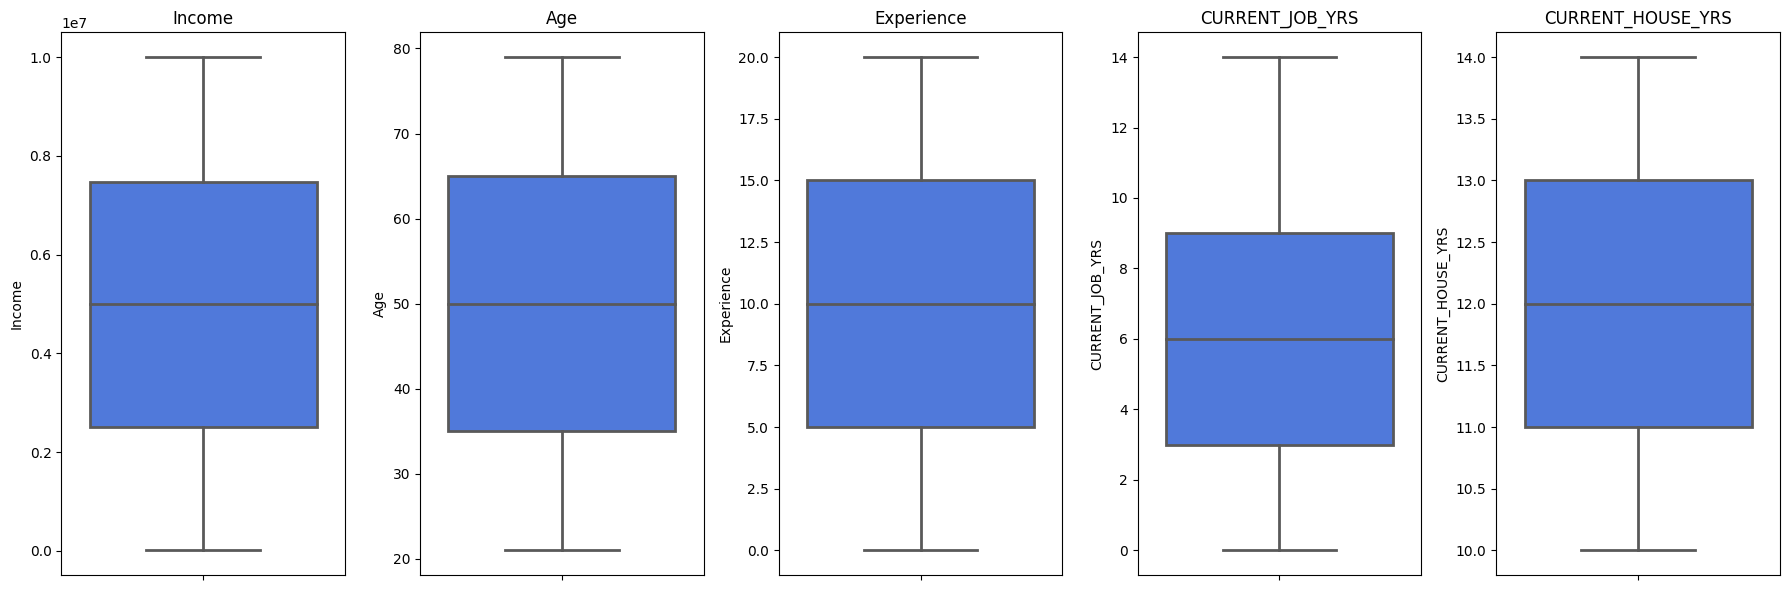

In [11]:
# Menggunakan len(numerical) untuk mendapatkan jumlah fitur numerik
palette=['#3970F1', '#D63434']
plt.figure(figsize=(18, 6))
# Loop melalui fitur numerik dan membuat subplot untuk setiap fitur
for i in range(len(num)):
    plt.subplot(1, len(num), i + 1)
    sns.boxplot(y=data[num[i]], palette=palette, orient='y', linewidth=2)
    plt.title(num[i])
    plt.tight_layout()

plt.show()

In [12]:
z_score = np.abs(stats.zscore(data['Age']))
filter_entri = (z_score < 3)
data = data[filter_entri]

In [13]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


#### D. Feature Transformation

<Axes: xlabel='Income', ylabel='Density'>

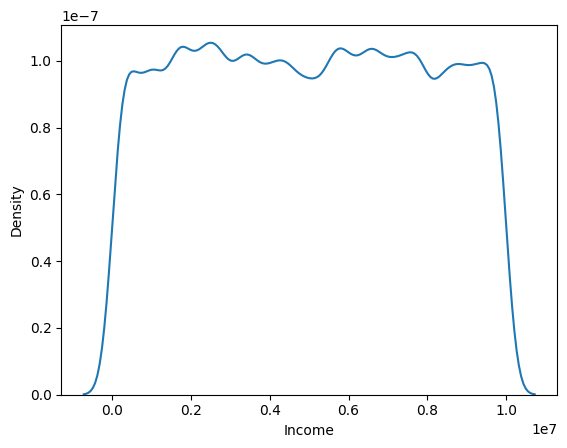

In [14]:
# distribusi Income (nilai asli)
sns.kdeplot(data['Income'])

Grafik menunjukan bahwa kolom income berditribusi normal. Dapat dilihat bahwa frekuensi terbesar maupun rata-rata dari data berada pada titik tengah.

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data['Income_norm'] = MinMaxScaler().fit_transform(data['Income'].values.reshape(len(data), 1))
data['Income_std'] = StandardScaler().fit_transform(data['Income'].values.reshape(len(data), 1))

In [16]:
data.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_norm,Income_std
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,2.520000e+05
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000,0.499198,4.436663e-17
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438,0.288130,1.000002e+00
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000,0.000000,-1.732550e+00
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000,0.249529,-8.665174e-01
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000,0.499557,1.243035e-03
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000,0.747495,8.617520e-01
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000,1.000000,1.738114e+00


#### E. Feature encoding

In [17]:
data[cat].describe()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


##### Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Married/Single'] = label_encoder.fit_transform(data['Married/Single'])
data['Car_Ownership'] = label_encoder.fit_transform(data['Car_Ownership'])

##### One Hot Encoding

In [19]:
Profesi_groups = {
    'tech_engineering'  : ['Industrial_Engineer', 'Air_traffic_controller', 'Architect', 'Aviator', 'Biomedical_Engineer', 'Chemical_engineer', 'Civil_engineer', 'Computer_hardware_engineer', 'Computer_operator', 'Design_Engineer', 'Engineer', 'Mechanical_engineer', 'Petroleum_Engineer', 'Software_Developer', 'Technology_specialist', 'Web_designer', 'Drafter', 'Technician', 'Surveyor', 'Technical_writer'],
    'business'          : ['Analyst', 'Chartered_Accountant', 'Economist', 'Financial_Analyst', 'Hotel_Manager','Chef'],
    'artist'            : ['Artist', 'Comedian', 'Fashion_Designer', 'Graphic_Designer', 'Designer','Dentist', 'Surgeon'],
    'social_scientist'  : ['Physician', 'Geologist', 'Microbiologist', 'Scientist', 'Statistician','Librarian', 'Magistrate'],
    'service'           : ['Consultant', 'Secretary', 'Psychologist', 'Civil_servant', 'Firefighter', 'Flight_attendant', 'Official', 'Politician','Army_officer', 'Lawyer', 'Police_officer']
}

# Buat kolom baru 'Profession Group' dan inisialisasi dengan nilai 'Other Professions'
data['Profession Group'] = 'Other Professions'

# Iterasi melalui dictionary Profesi_groups dan ubah nilai 'Profession Group' sesuai kriteria
for group, professions in Profesi_groups.items():
    data.loc[data['Profession'].isin(professions), 'Profession Group'] = group

# Lakukan one-hot encoding pada kolom 'Profession Group'
data_encoded_profesi = pd.get_dummies(data, columns=['Profession Group'], prefix=['Profession Group'])

In [20]:
State_groups = {
    'North'    : ['Chandigarh', 'Delhi', 'Haryana', 'Himachal_Pradesh', 'Jammu_and_Kashmir', 'Punjab', 'Uttar_Pradesh', 'Uttar_Pradesh[5]', 'Uttarakhand'],
    'South'    : ['Andhra_Pradesh', 'Karnataka', 'Kerala', 'Tamil_Nadu', 'Telangana', 'Puducherry'],
    'West'     : ['Gujarat', 'Maharashtra', 'Rajasthan'],
    'East'     : ['Assam', 'Bihar', 'Jharkhand', 'Odisha', 'Sikkim', 'West_Bengal'],
    'Center'   : ['Chhattisgarh', 'Madhya_Pradesh'],
    'Northeast': ['Manipur', 'Mizoram', 'Tripura']
}

# Buat kolom baru 'Region' dan inisialisasi dengan nilai 'Other'
data['Region'] = 'Other'

# Iterasi melalui dictionary State_groups dan ubah nilai 'Region' sesuai kriteria
for region, states in State_groups.items():
    data.loc[data['STATE'].isin(states), 'Region'] = region

# Lakukan one-hot encoding pada kolom 'Region'
data_encoded_state = pd.get_dummies(data, columns=['Region'], prefix=['Region'])

In [21]:
for cat in ['Profession Group', 'Region']:
    onehots = pd.get_dummies(data[cat], prefix=cat)
    data = data.join(onehots)

In [22]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Profession Group_business,Profession Group_service,Profession Group_social_scientist,Profession Group_tech_engineering,Region_Center,Region_East,Region_North,Region_Northeast,Region_South,Region_West
0,1,1303834,23,3,1,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,...,0,0,0,1,1,0,0,0,0,0
1,2,7574516,40,10,1,rented,0,Software_Developer,Parbhani,Maharashtra,...,0,0,0,1,0,0,0,0,0,1
2,3,3991815,66,4,0,rented,0,Technical_writer,Alappuzha,Kerala,...,0,0,0,1,0,0,0,0,1,0
3,4,6256451,41,2,1,rented,1,Software_Developer,Bhubaneswar,Odisha,...,0,0,0,1,0,1,0,0,0,0
4,5,5768871,47,11,1,rented,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,...,0,1,0,0,0,0,0,0,1,0


In [23]:
label_encoder = LabelEncoder()

data['Profession'] = label_encoder.fit_transform(data['Profession'])
data['STATE'] = label_encoder.fit_transform(data['STATE'])
data['CITY'] = label_encoder.fit_transform(data['CITY'])
data['House_Ownership'] = label_encoder.fit_transform(data['House_Ownership'])

In [24]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Profession Group_business,Profession Group_service,Profession Group_social_scientist,Profession Group_tech_engineering,Region_Center,Region_East,Region_North,Region_Northeast,Region_South,Region_West
0,1,1303834,23,3,1,2,0,33,251,13,...,0,0,0,1,1,0,0,0,0,0
1,2,7574516,40,10,1,2,0,43,227,14,...,0,0,0,1,0,0,0,0,0,1
2,3,3991815,66,4,0,2,0,47,8,12,...,0,0,0,1,0,0,0,0,1,0
3,4,6256451,41,2,1,2,1,43,54,17,...,0,0,0,1,0,1,0,0,0,0
4,5,5768871,47,11,1,2,0,11,296,22,...,0,1,0,0,0,0,0,0,1,0


In [25]:
# List kolom-kolom yang ingin diubah
bool_columns = ['Profession Group_artist', 'Profession Group_business', 'Profession Group_service',
                'Profession Group_social_scientist', 'Profession Group_tech_engineering',
                'Region_Center', 'Region_East', 'Region_North', 'Region_Northeast',
                'Region_South', 'Region_West']

# Mengubah kolom-kolom tersebut menjadi tipe data integer
data[bool_columns] = data[bool_columns].astype(int)


In [26]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Profession Group_business,Profession Group_service,Profession Group_social_scientist,Profession Group_tech_engineering,Region_Center,Region_East,Region_North,Region_Northeast,Region_South,Region_West
0,1,1303834,23,3,1,2,0,33,251,13,...,0,0,0,1,1,0,0,0,0,0
1,2,7574516,40,10,1,2,0,43,227,14,...,0,0,0,1,0,0,0,0,0,1
2,3,3991815,66,4,0,2,0,47,8,12,...,0,0,0,1,0,0,0,0,1,0
3,4,6256451,41,2,1,2,1,43,54,17,...,0,0,0,1,0,1,0,0,0,0
4,5,5768871,47,11,1,2,0,11,296,22,...,0,1,0,0,0,0,0,0,1,0


#### F. Handle Class Imbalance

In [27]:
data_encoding = data.drop(['Id', 'Income_std', 'CITY', 'CURRENT_JOB_YRS', 'STATE', 'Profession', 'Profession Group', 'Region' ], axis=1)

In [28]:
data_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 0 to 251999
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Income                             252000 non-null  int64  
 1   Age                                252000 non-null  int64  
 2   Experience                         252000 non-null  int64  
 3   Married/Single                     252000 non-null  int64  
 4   House_Ownership                    252000 non-null  int64  
 5   Car_Ownership                      252000 non-null  int64  
 6   CURRENT_HOUSE_YRS                  252000 non-null  int64  
 7   Risk_Flag                          252000 non-null  int64  
 8   Income_norm                        252000 non-null  float64
 9   Profession Group_artist            252000 non-null  int64  
 10  Profession Group_business          252000 non-null  int64  
 11  Profession Group_service           2520

In [29]:
data_encoding.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS,Risk_Flag,Income_norm,Profession Group_artist,Profession Group_business,Profession Group_service,Profession Group_social_scientist,Profession Group_tech_engineering,Region_Center,Region_East,Region_North,Region_Northeast,Region_South,Region_West
0,1303834,23,3,1,2,0,13,0,0.129487,0,0,0,0,1,1,0,0,0,0,0
1,7574516,40,10,1,2,0,13,0,0.757206,0,0,0,0,1,0,0,0,0,0,1
2,3991815,66,4,0,2,0,10,0,0.398564,0,0,0,0,1,0,0,0,0,1,0
3,6256451,41,2,1,2,1,12,1,0.625263,0,0,0,0,1,0,1,0,0,0,0
4,5768871,47,11,1,2,0,14,1,0.576454,0,0,1,0,0,0,0,0,0,1,0


In [30]:
# pembuatan binary label target
data_encoding['Risk_Class'] = data_encoding['Risk_Flag'] > 0.8
data_encoding['Risk_Class'].value_counts()

False    221004
True      30996
Name: Risk_Class, dtype: int64

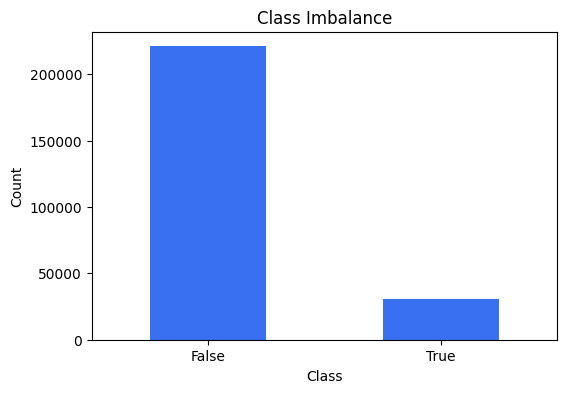

False    221004
True      30996
Name: Risk_Class, dtype: int64


In [31]:
# Menghitung jumlah sampel dalam setiap kelas
class_counts = data_encoding['Risk_Class'].value_counts()

# Membuat diagram batang untuk menampilkan class imbalance
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color='#3970F1')
plt.title('Class Imbalance')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation='horizontal')
plt.show()

# Menampilkan jumlah sampel dalam setiap kelas
print(class_counts)

In [32]:
# pemisahan features vs target
X = data_encoding[[col for col in data_encoding.columns if (str(data_encoding[col].dtype) != 'object') and col not in ['Risk_Flag', 'Risk_Class']]]
y = data_encoding['Risk_Class'].values
print(X.shape)
print(y.shape)

(252000, 19)
(252000,)


In [33]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

rus = RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under = rus.fit_resample(X, y)

ros = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = ros.fit_resample(X, y)

smote = SMOTE(sampling_strategy=0.5)
X_over_SMOTE, y_over_SMOTE = smote.fit_resample(X, y)

In [34]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
False    221004
True      30996
dtype: int64


UNDERSAMPLING
False    61992
True     30996
dtype: int64


OVERSAMPLING
False    221004
True     110502
dtype: int64


SMOTE
False    221004
True     110502
dtype: int64


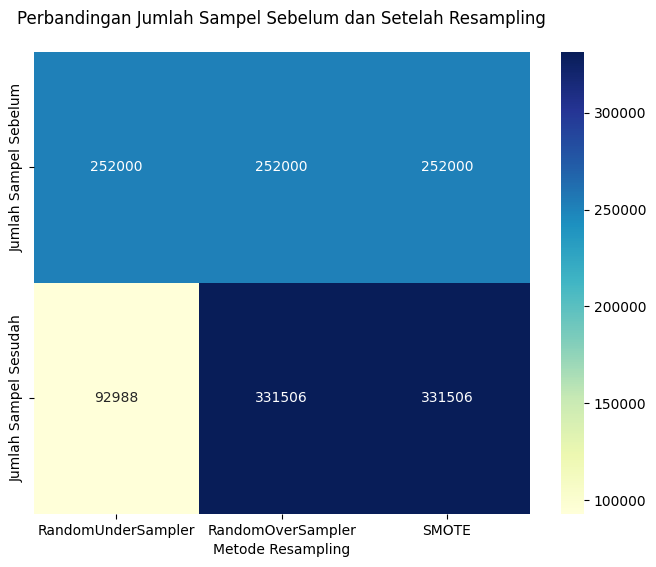

In [37]:
# Data jumlah sampel sebelum dan setelah resampling
data_resampling = {
    'Metode Resampling': ['RandomUnderSampler', 'RandomOverSampler', 'SMOTE'],
    'Jumlah Sampel Sebelum': [len(y), len(y), len(y)],
    'Jumlah Sampel Sesudah': [len(y_under), len(y_over), len(y_over_SMOTE)]
}

# Membuat DataFrame dari data resampling
df_resampling = pd.DataFrame(data_resampling)

# Membuat heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df_resampling.set_index('Metode Resampling').T, annot=True, cmap='YlGnBu', fmt='g')
heatmap.set_title('Perbandingan Jumlah Sampel Sebelum dan Setelah Resampling', pad=20)
plt.show()

In [38]:
# Membuat DataFrame baru dengan hasil SMOTE
data_new = pd.DataFrame(X_over_SMOTE, columns=data_encoding.drop(columns=['Risk_Class']).columns)
data_new['Risk_Class'] = y_over_SMOTE

data_new['Risk_Class'].value_counts()

False    221004
True     110502
Name: Risk_Class, dtype: int64

In [39]:
data_new.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS,Risk_Flag,Income_norm,Profession Group_artist,...,Profession Group_service,Profession Group_social_scientist,Profession Group_tech_engineering,Region_Center,Region_East,Region_North,Region_Northeast,Region_South,Region_West,Risk_Class
0,1303834,23,3,1,2,0,13,NaN,0.129487,0,...,0,0,1,1,0,0,0,0,0,False
1,7574516,40,10,1,2,0,13,NaN,0.757206,0,...,0,0,1,0,0,0,0,0,1,False
2,3991815,66,4,0,2,0,10,NaN,0.398564,0,...,0,0,1,0,0,0,0,1,0,False
3,6256451,41,2,1,2,1,12,NaN,0.625263,0,...,0,0,1,0,1,0,0,0,0,True
4,5768871,47,11,1,2,0,14,NaN,0.576454,0,...,1,0,0,0,0,0,0,1,0,True


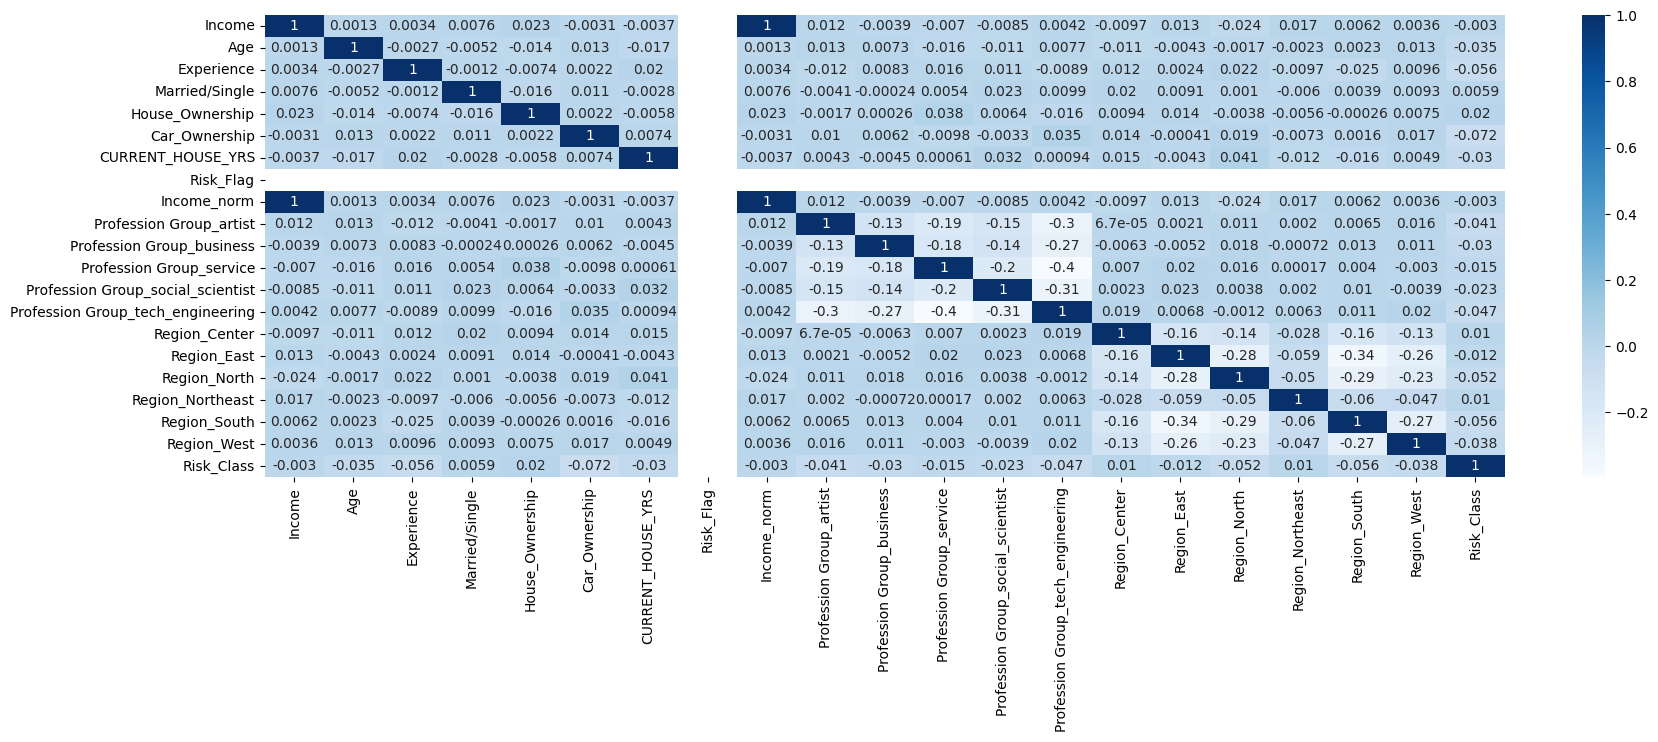

In [40]:
# Melihat Korelasi antara feature dan target
plt.figure(figsize=(20, 6))
sns.heatmap(data_new.corr(),
            cmap='Blues',
            annot=True,
           )

plt.show()

### Feature Engineering

#### Feature Selection

In [41]:
data_new = data_new.drop(columns=['Risk_Flag'])

In [42]:
data_new.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS,Income_norm,Profession Group_artist,Profession Group_business,Profession Group_service,Profession Group_social_scientist,Profession Group_tech_engineering,Region_Center,Region_East,Region_North,Region_Northeast,Region_South,Region_West,Risk_Class
0,1303834,23,3,1,2,0,13,0.129487,0,0,0,0,1,1,0,0,0,0,0,False
1,7574516,40,10,1,2,0,13,0.757206,0,0,0,0,1,0,0,0,0,0,1,False
2,3991815,66,4,0,2,0,10,0.398564,0,0,0,0,1,0,0,0,0,1,0,False
3,6256451,41,2,1,2,1,12,0.625263,0,0,0,0,1,0,1,0,0,0,0,True
4,5768871,47,11,1,2,0,14,0.576454,0,0,1,0,0,0,0,0,0,1,0,True


In [43]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331506 entries, 0 to 331505
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Income                             331506 non-null  int64  
 1   Age                                331506 non-null  int64  
 2   Experience                         331506 non-null  int64  
 3   Married/Single                     331506 non-null  int64  
 4   House_Ownership                    331506 non-null  int64  
 5   Car_Ownership                      331506 non-null  int64  
 6   CURRENT_HOUSE_YRS                  331506 non-null  int64  
 7   Income_norm                        331506 non-null  float64
 8   Profession Group_artist            331506 non-null  int64  
 9   Profession Group_business          331506 non-null  int64  
 10  Profession Group_service           331506 non-null  int64  
 11  Profession Group_social_scientist  3315

In [44]:
feature = data_new.iloc[:, :-1]
target = data_new['Risk_Class']

In [45]:
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [46]:
print(feature_train.shape)
print(feature_test.shape)
print(target_train.shape)
print(target_test.shape)

(265204, 19)
(66302, 19)
(265204,)
(66302,)


##### Numeric Correlation

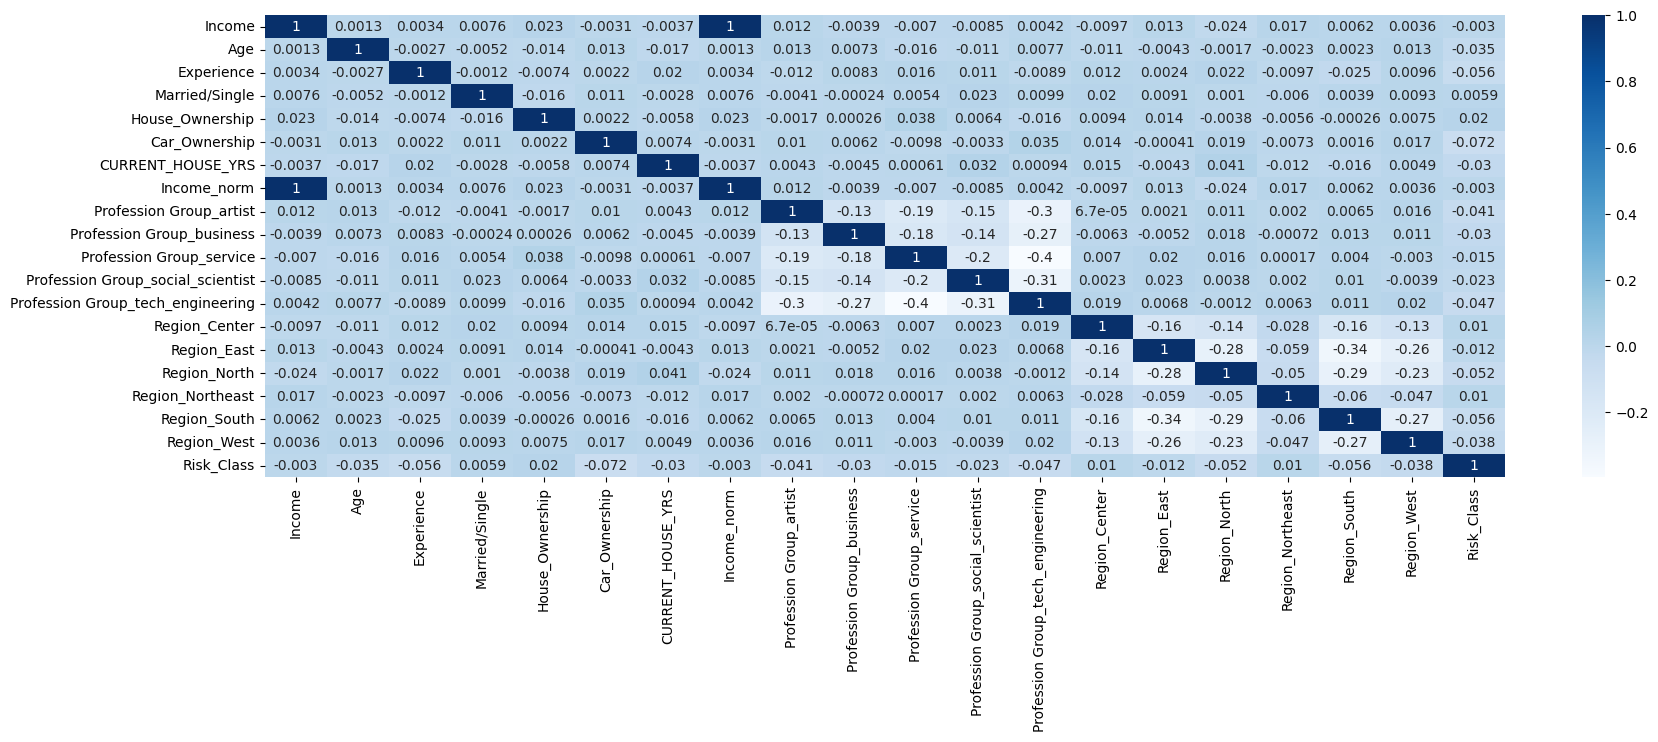

In [47]:
# Melihat Korelasi antara feature dan target menggunakan heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(data_new.corr(),
            cmap='Blues',
            annot=True,
           )

plt.show()

In [48]:
# Melihat Korelasi antara feature dan target menggunakan Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(feature_train, target_train)

target_pred = model.predict(feature_test)

In [49]:
model.intercept_

4186.416108444386

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

#Evaluasi Linear Regression

print('RMSE (test): ' + str(mean_squared_error(target_test, target_pred, squared=False)))
print('MAPE (test): ' + str(mean_absolute_percentage_error(target_test, target_pred)))
print('r2 (test): ' + str(r2_score(target_test, target_pred)))

RMSE (test): 0.4427560391419735
MAPE (test): 887222336151161.4
r2 (test): 0.11485478233703039


In [51]:
#Linear Regression Coefficient

model.coef_

array([-4.05969263e-01, -8.79359897e-04, -3.81721071e-03,  4.60957236e-02,
        4.11118626e-02, -4.33356497e-02, -2.76032714e-03,  4.05548190e+06,
       -2.89903788e-01, -2.78537788e-01, -2.55214371e-01, -2.65582188e-01,
       -2.73968367e-01, -2.37636279e-01, -2.69740310e-01, -3.08079329e-01,
       -2.10424808e-01, -3.09521308e-01, -2.97093744e-01])

##### Categoric

In [52]:
cat_feature = data_new[['Married/Single', 'House_Ownership', 'Car_Ownership', 'CURRENT_HOUSE_YRS']]
target = data_new['Risk_Class']

In [53]:
# Melihat Korelasi antara feature dan target menggunakan Chi Squere test

from sklearn.feature_selection import SelectKBest, chi2

kbest = SelectKBest(score_func=chi2, k='all')  # 'all' untuk mendapatkan semua fitur
feature_chi2 = kbest.fit_transform(feature_train, target_train)

p_values = kbest.pvalues_
selected_features = [cat_feature for cat_feature, p_value in zip(feature_train.columns, p_values) if p_value < 0.05]  # Misalnya, ambil fitur dengan p-value < 0.05

print("Selected Features:", selected_features)

Selected Features: ['Income', 'Age', 'Experience', 'House_Ownership', 'Car_Ownership', 'CURRENT_HOUSE_YRS', 'Profession Group_artist', 'Profession Group_business', 'Profession Group_service', 'Profession Group_social_scientist', 'Profession Group_tech_engineering', 'Region_Center', 'Region_East', 'Region_North', 'Region_Northeast', 'Region_South', 'Region_West']


In [54]:
from scipy.stats import chi2_contingency

def chi_square_test(data, cat_feature, target):
    contingency = pd.crosstab(data_new[cat_feature], data_new[target])
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    print("Correlation between " + cat_feature + " and " + target)
    print(f"Chi-squared value: {chi2:.2f}")
    print(f"p-value: {p_value:.2f}")

    if p_value < 0.05:
        print("The condition is not independent")
    else:
        print("The condition is independent")

In [55]:
for col in cat_feature:
    chi_square_test(data_new, col, 'Risk_Class')
    print(" ")
    print('---'*10, '\n')

Correlation between Married/Single and Risk_Class
Chi-squared value: 11.68
p-value: 0.00
The condition is not independent
 
------------------------------ 

Correlation between House_Ownership and Risk_Class
Chi-squared value: 127.82
p-value: 0.00
The condition is not independent
 
------------------------------ 

Correlation between Car_Ownership and Risk_Class
Chi-squared value: 1715.69
p-value: 0.00
The condition is not independent
 
------------------------------ 

Correlation between CURRENT_HOUSE_YRS and Risk_Class
Chi-squared value: 523.82
p-value: 0.00
The condition is not independent
 
------------------------------ 



In [56]:
# Melihat Korelasi antara feature dan target menggunakan Mutual Information Score

from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(cat_feature, target)

# Menampilkan skor untuk setiap fitur
for i, score in enumerate(mi_scores):
    print(f"Feature {cat_feature.columns[i]}: {score:.2f}")

Feature Married/Single: 0.04
Feature House_Ownership: 0.04
Feature Car_Ownership: 0.01
Feature CURRENT_HOUSE_YRS: 0.01


#### Feature Extraction

In [57]:
def age_group(Age):
    if Age < 11:
        return 'Child'
    elif Age < 25:
        return 'YoungAdult'
    elif Age < 45:
        return 'Adult'
    else:
        return 'Elderly'

data_new['Age_Group'] = data_new['Age'].apply(age_group)

In [58]:
def Income_group (income):
    if income < 4000000:
        return 'rendah'
    elif 4000000 <= income < 7000000:
        return 'sedang'
    else:
        return 'tinggi'

data_new['Income_Group'] = data_new['Income'].apply(Income_group)

In [59]:
data_new['Income'].describe()

count    3.315060e+05
mean     4.994402e+06
std      2.888684e+06
min      1.031000e+04
25%      2.478694e+06
50%      5.000063e+06
75%      7.505343e+06
max      9.999938e+06
Name: Income, dtype: float64

In [60]:
def categorize_experience(experience):
    if experience < 5:
        return 'baru'
    elif 5 <= experience < 10:
        return 'berpengalaman'
    else:
        return 'sangat berpengalaman'

data_new['Experience_Group'] = data_new['Experience'].apply(categorize_experience)


In [61]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331506 entries, 0 to 331505
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Income                             331506 non-null  int64  
 1   Age                                331506 non-null  int64  
 2   Experience                         331506 non-null  int64  
 3   Married/Single                     331506 non-null  int64  
 4   House_Ownership                    331506 non-null  int64  
 5   Car_Ownership                      331506 non-null  int64  
 6   CURRENT_HOUSE_YRS                  331506 non-null  int64  
 7   Income_norm                        331506 non-null  float64
 8   Profession Group_artist            331506 non-null  int64  
 9   Profession Group_business          331506 non-null  int64  
 10  Profession Group_service           331506 non-null  int64  
 11  Profession Group_social_scientist  3315

In [62]:
# Convert ke file CSV

data_new.to_csv("data_new.csv", index=False)